## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [3]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
#2 Check the shape of the DataFrame (rows, columns)

In [3]:
df.shape

(545, 13)

In [4]:
#3 Look at the data types of the columns

In [5]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
#4 Check for missing  values if any, replace with appropriate values

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
#5 Prepare  X (independent variables) and y (dependent variable)

In [9]:
X=df.drop(columns=['price'])
y=df['price']

In [10]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

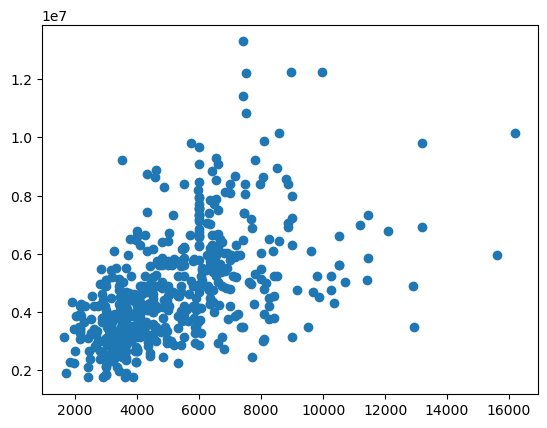

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X['area'],y)
# plt.scatter(X['bedrooms'],y)
# plt.scatter(X['hotwaterheating'],y)

In [12]:
#7 Encoding categorical data in X

In [5]:
categorical_cols=df.select_dtypes(include=['object']).columns
categorical_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
laE=LabelEncoder()
for cols in categorical_cols:
    df[cols]=laE.fit_transform(df[cols])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [15]:
#8  Avoiding the Dummy Variable Trap

In [7]:
cleaned_df=pd.get_dummies(df,drop_first=True)
cleaned_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [17]:
#9 Apply feature scaling on numerical variables

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns+)
df_standardized

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286


In [19]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

In [8]:
from sklearn.model_selection import train_test_split
X=cleaned_df.drop(columns=['price'])
y=cleaned_df['price']
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [21]:
#11 Fitting Multiple Linear Regression to the Training

[ 2.58737243e+02  1.71282075e+05  1.14582285e+06  4.17677302e+05
  2.48051089e+05  5.73451394e+05  2.41333567e+05  1.81212243e+05
  6.67832207e+05  7.71471006e+05  6.67094842e+05  6.58699872e+03
 -3.96995073e+05] -312088.6479766695


Text(0, 0.5, 'sales')

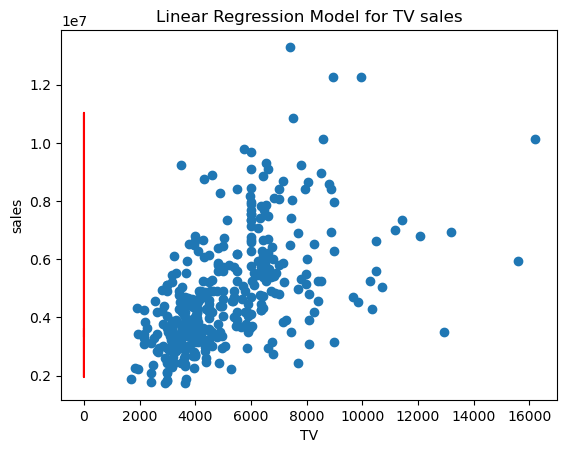

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

# plt.scatter(x_train,y_train)
print(model.coef_, model.intercept_)



plt.scatter(X_train['area'],y_train)
plt.plot(X_train['mainroad_yes'],model.predict(X_train),color='red')
plt.title("Linear Regression Model for TV sales")
plt.xlabel("TV")
plt.ylabel("sales")

In [23]:
#12 Predict on the train set and calculate the error = y_pred - y_train

In [24]:
Y_pred = model.predict(X_train)

# Compare actual vs predicted values
df_results = pd.DataFrame({'Actual': y_train, 'Predicted': Y_pred})
print(df_results)
error=Y_pred-y_train
error

      Actual     Predicted
500  2660000  2.628786e+06
74   6650000  5.352312e+06
494  2730000  3.464918e+06
212  4893000  6.263054e+06
417  3395000  3.127022e+06
..       ...           ...
203  4900000  3.962150e+06
298  4200000  5.012010e+06
173  5250000  5.909060e+06
359  3710000  3.041302e+06
425  3360000  3.846146e+06

[381 rows x 2 columns]


500   -3.121364e+04
74    -1.297688e+06
494    7.349181e+05
212    1.370054e+06
417   -2.679784e+05
           ...     
203   -9.378505e+05
298    8.120105e+05
173    6.590602e+05
359   -6.686982e+05
425    4.861461e+05
Name: price, Length: 381, dtype: float64

In [25]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

Text(0, 0.5, 'Train Values')

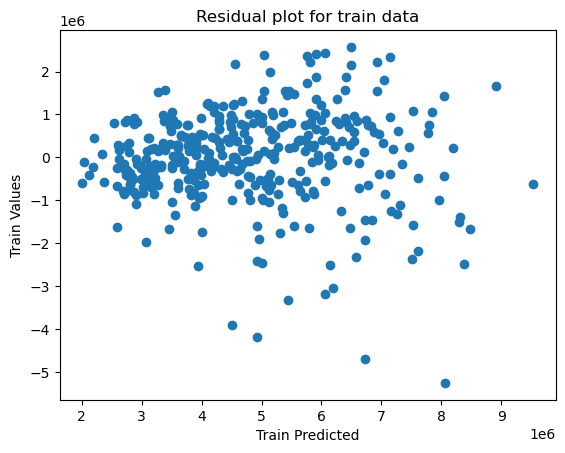

In [26]:
plt.scatter(Y_pred,error)
plt.title("Residual plot for train data")
plt.xlabel("Train Predicted")
plt.ylabel("Train Values")

In [27]:
#14  Predic on the test set

In [28]:
Y_pred_test = model.predict(x_test)

# Compare actual vs predicted values
df1_results = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred_test})
print(df1_results)
error_test=Y_pred_test-y_test
error_test

      Actual     Predicted
150  5600000  5.828402e+06
170  5250000  4.880625e+06
52   7350000  7.579509e+06
90   6440000  4.677213e+06
520  2450000  3.679213e+06
..       ...           ...
67   6895000  5.257860e+06
267  4403000  3.953599e+06
338  3885000  4.046074e+06
272  4340000  4.285929e+06
489  2835000  3.039897e+06

[164 rows x 2 columns]


150    2.284023e+05
170   -3.693748e+05
52     2.295089e+05
90    -1.762787e+06
520    1.229213e+06
           ...     
67    -1.637140e+06
267   -4.494010e+05
338    1.610745e+05
272   -5.407077e+04
489    2.048966e+05
Name: price, Length: 164, dtype: float64

In [29]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

Text(0, 0.5, 'Test Values')

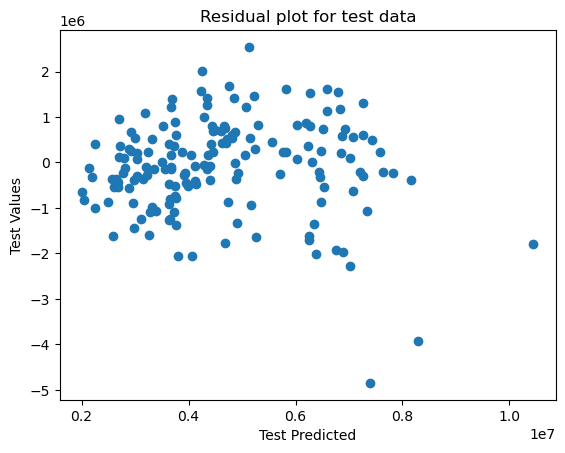

In [30]:
plt.scatter(Y_pred_test,error_test)
plt.title("Residual plot for test data")
plt.xlabel("Test Predicted")
plt.ylabel("Test Values")

In [31]:
#16 Print Mean Squared Error and R Squared Value

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred_df = model.predict(X)
mse = mean_squared_error(y, Y_pred_df)
print(mse)
r2 = r2_score(y, Y_pred_df)
print(r2)

1124357475846.79
0.678030576468739


In [33]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)

In [34]:
n=X.shape[0]
p=X.shape[1]
adjusted_r2=1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.6707681082687857

In [35]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64